<a href="https://colab.research.google.com/github/Anirudhvr02/da6401_assignment1/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DA6401 - Fundamentals of Deep Learning**  
## Assignment 1: Implementing a Feedforward Neural Network with Backpropagation for Fashion-MNIST Classification  

Question 1 :
Download the fashion-MNIST dataset and plot 1 sample image for each class as shown in the grid below. Use from keras.datasets import fashion_mnist for getting the fashion mnist dataset.

In [1]:
# Importing the Required Libraries

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import wandb

In [2]:
!pip install wandb -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 61.7 MB/s eta 0:00:00


In [3]:
# To load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Class labels for Fashion-MNIST
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: anirudhvr02 (anirudhvr02-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [6]:
wandb.init(
    project="DA6401_Assignment1"
)

wandb: Currently logged in as: anirudhvr02 (anirudhvr02-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [7]:
# Fashion-MNIST: Visualizing One Sample Per Class
sample_images = []
sample_labels = []

for i in range(10):
    idx = np.where(y_train == i)[0][0]
    sample_images.append(x_train[idx])
    sample_labels.append(class_labels[i])

    # Logging the image to Wandb
    wandb.log({f"Sample {class_labels[i]}": wandb.Image(x_train[idx], caption=class_labels[i])})

wandb.finish()

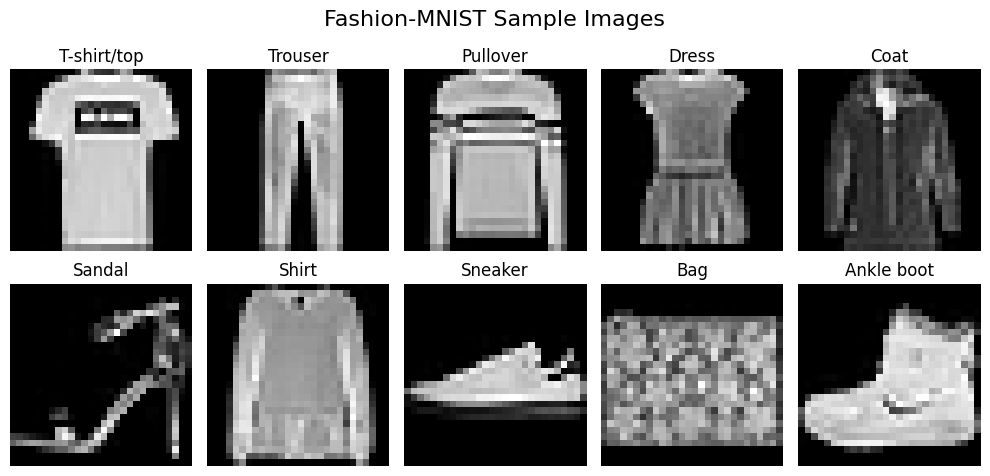

In [8]:
# Plot the sample images in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Fashion-MNIST Sample Images", fontsize=16)

for ax, img, label in zip(axes.flat, sample_images, sample_labels):
    ax.imshow(img, cmap="gray")
    ax.set_title(label)
    ax.axis("off")

plt.tight_layout()
plt.show()